In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Filtering warnings
import warnings
warnings.filterwarnings('ignore')

# Overview

This dataset contains all the incidents of crossing the border into the US as provided by the Bureau of Transportation Statistics, Govt. of the US. This dataset tells about the incoming counts into the US.

This can prove to be a vital dataset to predict the average incoming counts into the future seeing the current trend. A primary look tells us that 77% of the incidents marked in the dataset consisted of US-Canada border meaning Canadians have tended to come in more frequently into the US as compared to the Mexicans.

This data can also prove to useful to predict the daily or weekly or monthly or annual traffic that's going to accumulate on the borders so that the authorities can be aware of the number beforehand.

In [98]:
# Created function to parse date
mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M")

# Importing dataset
data = pd.read_csv("border.csv", dtype={'Port Name': 'category', 'State': 'category', 'Border': 'category'}, 
                   parse_dates=['Date'], date_parser=mydateparser)
data.info()

C:\Users\hukha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Port Name  355511 non-null  category      
 1   State      355511 non-null  category      
 2   Port Code  355511 non-null  int64         
 3   Border     355511 non-null  category      
 4   Date       355511 non-null  datetime64[ns]
 5   Measure    355511 non-null  object        
 6   Value      355511 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(2), object(1)
memory usage: 11.9+ MB


In [3]:
# Print the data
data.sample(n=15).sort_values('Value', ascending=False)

,Port Name,State,Port Code,Border,Date,Measure,Value
351876,Oroville,WA,3019,US-Canada Border,1996-01-03,Personal Vehicles,24151
345543,Otay Mesa,CA,2506,US-Mexico Border,1996-01-09,Bus Passengers,13934
240712,Norton,VT,211,US-Canada Border,2003-01-09,Personal Vehicle Passengers,11642
166524,Detroit,MI,3801,US-Canada Border,2008-01-04,Buses,2748
286054,Beecher Falls,VT,206,US-Canada Border,2000-01-09,Trucks,1753
155673,Westhope,ND,3419,US-Canada Border,2009-01-01,Personal Vehicle Passengers,1448
311291,Portal,ND,3403,US-Canada Border,1998-01-12,Train Passengers,435
306624,Noyes,MN,3402,US-Canada Border,1999-01-04,Train Passengers,257
120392,Laurier,WA,3016,US-Canada Border,2011-01-03,Truck Containers Full,211
288872,Naco,AZ,2603,US-Mexico Border,2000-01-06,Truck Containers Empty,153


In [37]:
# Checking for missing values
data.isna().any()
data.isna().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
dtype: int64

In the above result, we can see that there is no missing values in this dataset.  

In [4]:
data_border = data.groupby(['Border'])['Value'].agg([sum]).rename(columns={'sum':"Visitors"}).reset_index()
data_border

,Border,Visitors
0,US-Canada Border,2776127401
1,US-Mexico Border,7337300710


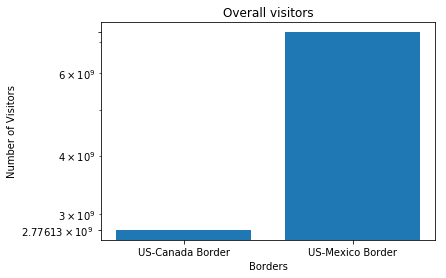

In [5]:
plt.bar(data_border['Border'], data_border['Visitors'])
plt.xlabel('Borders')
plt.ylabel('Number of Visitors')
plt.title('Overall visitors')
plt.yscale('log')
plt.yticks(data_border['Visitors'])
plt.show()

In [6]:
# Different means of transporation with Mexican and Canadian Borders
data['Measure'].unique()

array(['Personal Vehicle Passengers', 'Personal Vehicles',
       'Truck Containers Empty', 'Truck Containers Full', 'Trucks',
       'Bus Passengers', 'Buses', 'Pedestrians', 'Rail Containers Empty',
       'Rail Containers Full', 'Train Passengers', 'Trains'], dtype=object)

I was wondering how many different channel of transporations are there among the travellers. Now I am going to see the number of visitors with reference to channel of transportation between these two borders.

In [7]:
# Grouped summary of Measures by Borders
data_measure = data.groupby(['Border', 'Measure'])['Value'].agg([sum]).rename(columns={'sum':"Visitors"}).reset_index().sort_values(['Border','Visitors'], ascending=False)
data_measure

,Border,Measure,Visitors
15,US-Mexico Border,Personal Vehicle Passengers,4043076782
16,US-Mexico Border,Personal Vehicles,1890535412
14,US-Mexico Border,Pedestrians,1076593384
23,US-Mexico Border,Trucks,117244433
22,US-Mexico Border,Truck Containers Full,74970813
12,US-Mexico Border,Bus Passengers,70092929
21,US-Mexico Border,Truck Containers Empty,41057442
17,US-Mexico Border,Rail Containers Empty,9350352
18,US-Mexico Border,Rail Containers Full,8281197
13,US-Mexico Border,Buses,5589037


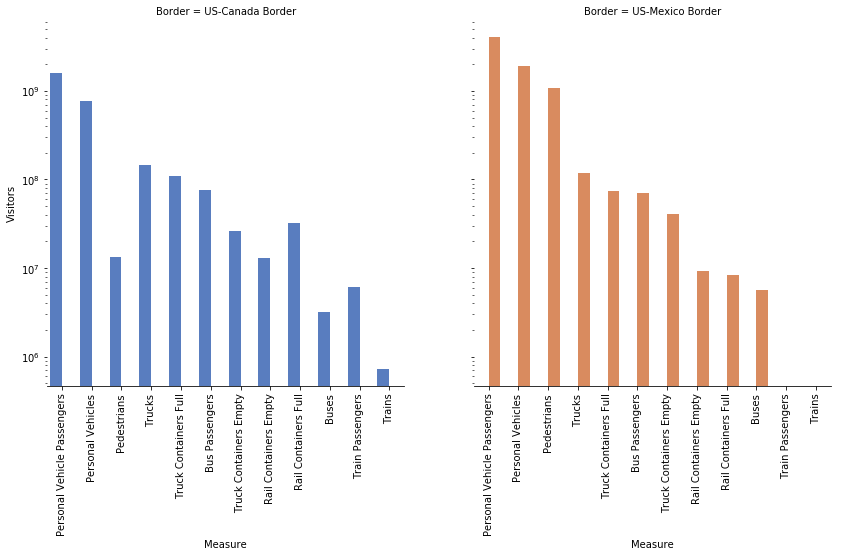

In [196]:
s= sns.catplot(x="Measure", y="Visitors", hue="Border", data= data_measure, kind="bar", palette="muted",
           height=6, col="Border")
s.despine(left=True)
s.set_xticklabels(rotation=90)
s.set(yscale="log")

Personal vehicle passengers & vehicles, trucks and bus passengers are the mostly used means of transportation in US-Canada Borders while, personal vehicles and pedestrians are the mostly using means of transportation in US-Mexican Borders. 

In [8]:
# Ports
data_port = data.groupby('Port Name')['Value'].agg([sum]).reset_index().rename(columns={'sum':"Visitors"}).sort_values('Visitors',ascending=False)
data_port2 = data_port.head(10)
data_port2

,Port Name,Visitors
34,El Paso,1186748989
91,San Ysidro,1184198982
51,Laredo,676914805
44,Hidalgo,583725539
15,Buffalo-Niagara Falls,559736205
17,Calexico,538455020
14,Brownsville,533360410
29,Detroit,497457335
72,Otay Mesa,471000461
64,Nogales,414830531


In [215]:
# Number of Ports between these two borders?
data_port['Port Name'].count()

116

In [99]:
data_date = data.groupby(['Date', 'Border'])['Value'].agg([sum]).reset_index()
data_date['Year'] = data_date['Date'].dt.strftime('%Y')

data_date2 = data_date.groupby(['Border','Year'])['sum'].agg([sum]).reset_index()
data_date2.head()

,Border,Year,sum
0,US-Canada Border,1996,153038903
1,US-Canada Border,1997,145512710
2,US-Canada Border,1998,142291790
3,US-Canada Border,1999,146497328
4,US-Canada Border,2000,147789673


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text xticklabel objects>)

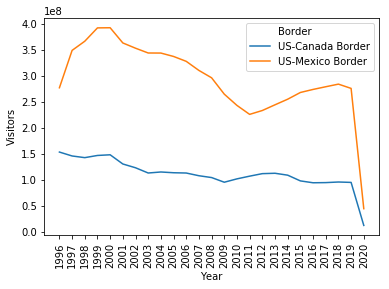

In [96]:
# Visualize frequency of crossings in date
sns.lineplot(x="Year", y="sum", hue="Border",data=data_date2)
plt.xlabel('Year')
plt.ylabel('Visitors')
plt.xticks(rotation=90)


In the above lineplot, we can see that US-Mexico Border has more frequent travellers as compared with US-Canadian Border. In both borders, passenger vehicles are the mostly using mean of transportation in both borders but pedestrians is also used frequently in US-Mexican border.